In [1]:
import tensorflow as tf

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras import optimizers
from pandas import Series
import math
import numpy
from tensorflow.keras.layers import *
from tensorflow.keras import layers
import pandas as pd
from pandas import  DataFrame
from pandas import  concat

data = pd.read_csv("SeoulBikeData (1).csv")

In [2]:
from sklearn.datasets import load_boston
import xgboost
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import lightgbm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
def mean_absolute_percentage_error(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [4]:
data

,Date,Rented Bike Count,Hour,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [5]:
data = data[['Temperature', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Rented Bike Count']]
data

,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,254
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,204
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,173
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,107
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,78
...,...,...,...,...,...,...,...,...,...
8755,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1003
8756,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,764
8757,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,694
8758,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,712


In [6]:
data.head(30)

,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,254
1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,204
2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,173
3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,107
4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,78
5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,100
6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,181
7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,460
8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,930
9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,490


In [7]:
days_in = 24
days_out = 1

raw = []

for i in range (days_in,0,-1):
    raw.append(data.shift(i))
    
for i in range (0, days_out):
    raw.append(data.shift(-i))

sum = concat(raw, axis = 1)
sum.dropna(inplace = True)

sum

,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count,Temperature,...,Rented Bike Count,Temperature,Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature,Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Rented Bike Count
24,-5.2,37.0,2.2,2000.0,-17.6,0.0,0.0,0.0,254.0,-5.5,...,323.0,-1.8,87,1.1,994,-3.6,0.0,0.0,0.0,328
25,-5.5,38.0,0.8,2000.0,-17.6,0.0,0.0,0.0,204.0,-6.0,...,328.0,-2.2,86,0.6,990,-4.2,0.0,0.0,0.0,308
26,-6.0,39.0,1.0,2000.0,-17.7,0.0,0.0,0.0,173.0,-6.2,...,308.0,-2.9,86,1.5,1256,-4.9,0.0,0.0,0.0,262
27,-6.2,40.0,0.9,2000.0,-17.6,0.0,0.0,0.0,107.0,-6.0,...,262.0,-3.5,81,2.2,1221,-6.2,0.0,0.0,0.0,167
28,-6.0,36.0,2.3,2000.0,-18.6,0.0,0.0,0.0,78.0,-6.4,...,167.0,-3.8,79,2.0,1167,-6.9,0.0,0.0,0.0,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,5.2,48.0,1.9,1590.0,-4.9,0.0,0.0,0.0,1026.0,4.1,...,1384.0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,1003
8756,4.1,54.0,1.3,1434.0,-4.3,0.0,0.0,0.0,818.0,3.8,...,1003.0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,764
8757,3.8,55.0,2.1,1231.0,-4.4,0.0,0.0,0.0,792.0,3.0,...,764.0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,694
8758,3.0,59.0,1.1,1218.0,-4.2,0.0,0.0,0.0,726.0,2.6,...,694.0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,712


In [8]:
sum.shape

(8736, 225)

In [9]:
cols = sum.columns[:]
cols

Index(['Temperature', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
       'Dew point temperature', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Rented Bike Count', 'Temperature',
       ...
       'Rented Bike Count', 'Temperature', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Rented Bike Count'],
      dtype='object', length=225)

In [10]:
sum.columns[-1]

'Rented Bike Count'

In [11]:
from sklearn.preprocessing import MinMaxScaler
values = sum[cols].values.reshape(-1,225)
values = values.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [12]:
from sklearn.preprocessing import MinMaxScaler
values = sum.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [13]:
scaled.shape

(8736, 225)

In [14]:
train_size = int(len(scaled) * 0.90)
test_size = int(len(scaled) * 0.10)

In [15]:
train, test = scaled[0:train_size,:], scaled[train_size:,:]
print(len(train),len(test))

7862 874


In [16]:
sum.shape

(8736, 225)

In [17]:
X_train = train[:,0:-1]
y_train = train[:,224]
X_test = test[:,0:-1]
y_test = test[:,224]

In [18]:
x = scaled [:,0:-1]
y = scaled [:,224]

In [19]:
folds=[]
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=30)
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=30, test_size=None)


In [20]:
for train, test in tscv.split(x):
    folds.append((train, test))
    print("TRAIN:", train, "TEST:", test)
    train_x, test_x = x[train], x[test]
    train_y, test_y = y[train], y[test]

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [21]:
evals = [ (train_x, train_y), (test_x, test_y)]

In [22]:
train_x.shape

(8455, 224)

In [23]:
train_x

array([[0.2202797 , 0.37755102, 0.2972973 , ..., 0.        , 0.        ,
        0.        ],
       [0.21503493, 0.3877551 , 0.1081081 , ..., 0.        , 0.        ,
        0.        ],
       [0.20629369, 0.39795917, 0.13513513, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.35489509, 0.5       , 0.05405405, ..., 0.        , 0.        ,
        0.        ],
       [0.3513986 , 0.5408163 , 0.08108108, ..., 0.        , 0.        ,
        0.        ],
       [0.34440556, 0.5408163 , 0.05405405, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [24]:
test_x.shape

(281, 224)

### xgb_boost

xgb_boost(1) 

In [30]:
from numpy import sqrt 
def mean_absolute_percentage_error(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [31]:
xgb_model1 = xgboost.XGBRegressor(n_estimators=200, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=50)

xgb_model1.fit(train_x,train_y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.08, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=50, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=200, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [54]:
predict = xgb_model1.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))
predicted = xgb_model1.predict(test_x)
test_mae = mean_absolute_error(test_y, predicted)
test_mse = mean_squared_error(test_y, predicted)
mape=mean_absolute_percentage_error(test_y, predicted)

print('Test MAPE: ', mape)
print('Test RMSE :', test_rmse)
print('Test MAE :', test_mae)
print('Test MSE :', test_mse)

Test MAPE:  0.15537137
Test RMSE : 0.039785843
Test MAE : 0.023813028
Test MSE : 0.0015829133


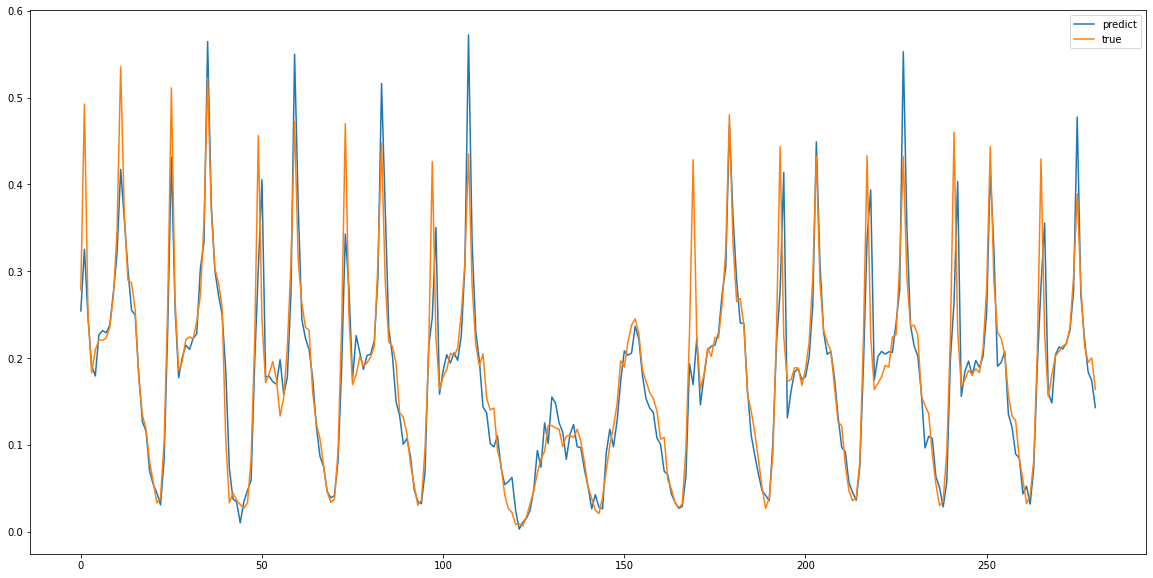

In [33]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = grid_cv.predict(test_x)
#yhat=yhat.reshape(-1,1)
#print(yhat)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()

### lightgbm

In [35]:
from lightgbm import LGBMRegressor

In [36]:
lgbm_r = LGBMRegressor(n_estimators = 100, random_state = 30)

In [37]:
lgbm_r.fit(train_x, train_y,
             early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
             verbose=True)

/home/yr19/anaconda3/envs/time/lib/python3.7/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/yr19/anaconda3/envs/time/lib/python3.7/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's auc: 0.896898	training's l2: 0.0277315	valid_1's auc: 1	valid_1's l2: 0.0105521
[2]	training's auc: 0.909625	training's l2: 0.0229246	valid_1's auc: 1	valid_1's l2: 0.00893495
[3]	training's auc: 0.945678	training's l2: 0.0190119	valid_1's auc: 1	valid_1's l2: 0.00771275
[4]	training's auc: 0.945662	training's l2: 0.0158154	valid_1's auc: 1	valid_1's l2: 0.00682907
[5]	training's auc: 0.945624	training's l2: 0.0132245	valid_1's auc: 1	valid_1's l2: 0.00611012
[6]	training's auc: 0.945812	training's l2: 0.0111116	valid_1's auc: 1	valid_1's l2: 0.00544605
[7]	training's auc: 0.945776	training's l2: 0.0093597	valid_1's auc: 1	valid_1's l2: 0.00489227
[8]	training's auc: 0.945714	training's l2: 0.00791541	valid_1's auc: 1	valid_1's l2: 0.00447383
[9]	training's auc: 0.949882	training's l2: 0.00675031	valid_1's auc: 1	valid_1's l2: 0.0040861
[10]	training's auc: 0.949917	training's l2: 0.00577881	valid_1's auc: 1	valid_1's l2: 0.0039129
[11]	training's auc: 0.950001	training'

LGBMRegressor(random_state=30)

In [55]:
predict = lgbm_r.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))
predicted = lgbm_r.predict(test_x)
test_mae = mean_absolute_error(test_y, predicted)
test_mse = mean_squared_error(test_y, predicted)
mape=mean_absolute_percentage_error(test_y, predicted)

print('Test MAPE: ', mape)
print('Test RMSE :', test_rmse)
print('Test MAE :', test_mae)
print('Test MSE :', test_mse)

Test MAPE:  0.1461646553448808
Test RMSE : 0.03621544617864471
Test MAE : 0.021499089507612028
Test MSE : 0.0013115585419183119


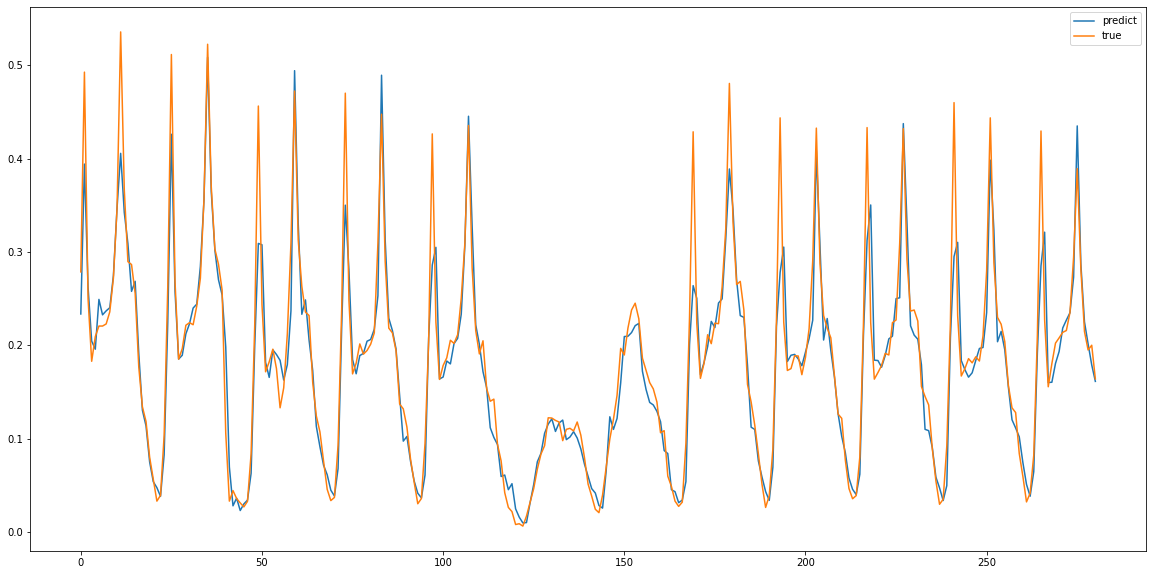

In [39]:

from sklearn.metrics import *

from matplotlib import pyplot
yhat = lgbm_r.predict(test_x)
#yhat=yhat.reshape(-1,1)
#print(yhat)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()


## r_f

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [47]:
params = {
    'n_estimators':(100, 500),
    'max_depth' : (5, 30),
    'min_samples_leaf' : (3, 10),
    'min_samples_split' : (3, 10)
}

In [48]:
rf_run = RandomForestRegressor(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_run, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(train_x, train_y)

GridSearchCV(cv=2, estimator=RandomForestRegressor(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': (5, 30), 'min_samples_leaf': (3, 10),
                         'min_samples_split': (3, 10),
                         'n_estimators': (100, 500)})

In [49]:
print("GridSearchCV best params:", grid_cv.best_params_)

GridSearchCV best params: {'max_depth': 30, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 500}


In [57]:
predict = grid_cv.predict(test_x)
test_rmse = sqrt(mean_squared_error(test_y, predict))
predicted = grid_cv.predict(test_x)
test_mae = mean_absolute_error(test_y, predicted)
test_mse = mean_squared_error(test_y, predicted)
mape=mean_absolute_percentage_error(test_y, predicted)

print('Test MAPE: ', mape)
print('Test RMSE :', test_rmse)
print('Test MAE :', test_mae)
print('Test MSE :', test_mse)

Test MAPE:  0.16135475844071923
Test RMSE : 0.045055502298625025
Test MAE : 0.025884810791383023
Test MSE : 0.002029998287381405


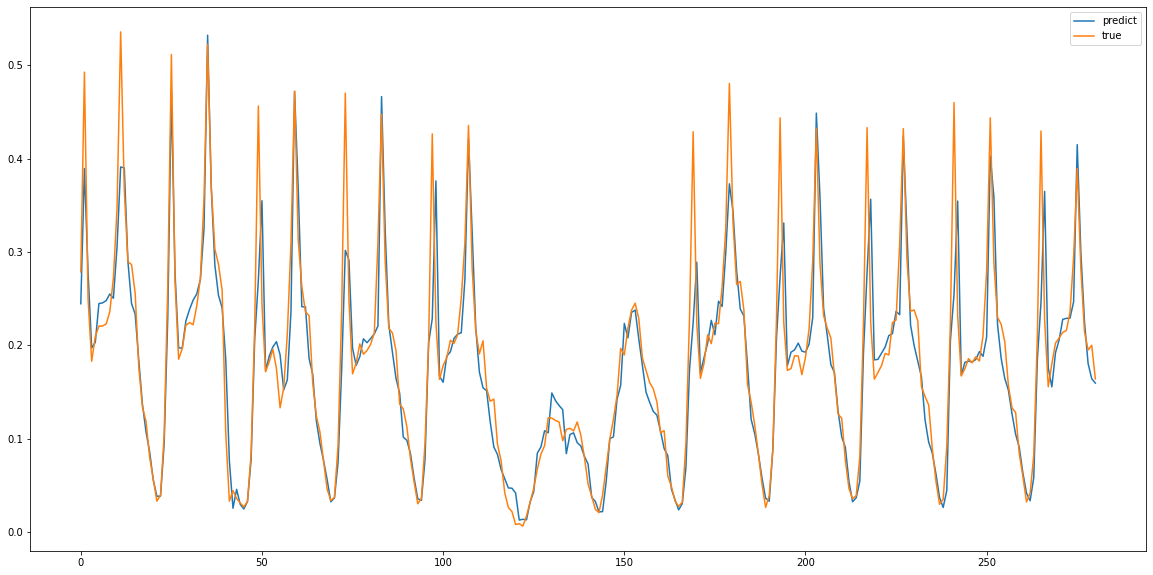

In [51]:
from sklearn.metrics import *

from matplotlib import pyplot
yhat = grid_cv.predict(test_x)
#yhat=yhat.reshape(-1,1)
#print(yhat)
plt.figure(figsize=(20,10))

pyplot.plot(yhat, label='predict')
pyplot.plot(test_y, label='true')
pyplot.legend()
pyplot.show()